<h1><center>Laboratorio 6: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Carolina Salgado
- Nombre de alumno 2: Sebastián Urbina


### **Link de repositorio de GitHub:** https://github.com/SebasUrbina/MDS7202


## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
# !pip install --upgrade pandas
# !pip install xlrd
# !pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
# !pip install --upgrade plotly
# !pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas.

Para esto, el área de ventas les entrega el archivo `online_retail_II.pickle` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [3]:
df_retail = pd.read_pickle("recursos/online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
# Informacion general del set de datos
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  category      
 1   StockCode    525461 non-null  category      
 2   Description  525461 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  category      
 7   Country      525461 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 24.6+ MB


Los datos se componen de 8 atributos los cuales se listan y describen a continuación:

1. `Invoice`: Corresponde a la boleta o factura, es decir, representa la compra de cliente.
2. `StockCode`: Es el codigo o SKU del producto.
3. `Description`: Nombre o descripción del producto.
4. `Quantity`: Cantidad llevada por factura.
5. `InvoiceDate`: Fecha en la que la factura se emite, es decir, es cuándo se efectúa la compra.
6. `Price`: Precio del producto.
7. `Customer ID`: Número que identifica al cliente.
8. `Country`: Pais donde se hizo efectiva la compra.

## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

El análisis univariable consiste en estudiar las características de cada variable de manera individual, utilizando técnicas estadísticas y gráficas para explorar su distribución, tendencias y valores atípicos. A diferencia del análisis multivariable que trata en el estudio de las relaciones entre atributos, utilizando gráficas y métricas que permiten visualizar y medir la asociación. Mientras que el análisis de datos faltantes hace referencia al estudio de los vacíos presentes en el set de datos y se decide cómo manejarlos para evitar sesgos en el análisis. 

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [5]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns = {'count': 'Count'})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [6]:
# Invoice
profile_serie(df_retail["Invoice"])

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

La variable `Invoice` representa las facturas generadas por la tienda. Por lo tanto tiene sentido que hayan datos duplicados, ya que cada fila representa una cantidad de producto agregada a la factura y una mismo compra puede contener más de un producto. Bajo esa lógica, las categorías o boletas más frecuentes mostradas por el hstograma realmente muestran las compras que llevaron una mayor cantidad de productos.

Por otra parte, que no existan datos nulos para este atributo es una buena señal, ya que indica que todos los productos están asignados a una compra.

In [7]:
# StockCode
profile_serie(df_retail["StockCode"])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

El atributo `StockCode` representa el código de un producto particular. Por lo tanto tiene sentido que hayan datos duplicados, ya que cada fila representa una cantidad de producto comprada y un mismo producto puede ser llevado en más de una compra. Bajo esa lógica, las categorías o productos más frecuentes mostrados por el hstograma realmente muestra los productos que más frecuetemente aparecen en una compra.

Por otra parte, que no existan datos nulos para este atributo es una buena señal, ya que indica que se puede identificar a los productos de una compra.

Además, se observan 4632 productos (valores únicos).

In [8]:
# Description
profile_serie(df_retail["Description"])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

Al igual que la variable anterior, `Description` representa a los productos de la tienda, pero en este caso es un texto que lo describe. Así que también tiene sentido que hayan datos duplicados, ya que cada fila representa una cantidad de producto comprada y un mismo producto puede ser llevado en más de una compra. Bajo esa lógica, las categorías o productos más frecuentes mostrados por el hstograma realmente muestra las descripciones de los productos que más frecuentemente aparecen en una compra.

Por otra parte, que no existan datos nulos para este atributo es una buena señal, ya que indica que se puede identificar la descripción de los productos de una compra.

In [9]:
profile_serie(df_retail["Quantity"])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

Se puede observar que la variable `Quantity` presenta bastantes outliers, además, hay cantidades negativas (2.35%), lo cual no debería ocurrir porque representa la cantidad de productivos vendidos. Bajo el supuesto de que sólo se venden productos, valores negativos carecen de sentido.

Asimismo, hay una gran cantidad de duplicados, sin embargo, como son datos transacciones es de esperarse ya que pueden haber transacciones o ventas en las cuales se vendio la misma cantidad de productos.

Afortundamante no se presentan valores nulos ni iguales a 0. 

La Skewness es positiva, lo que nos dice que la cantidad de productos está sesgada hacia cantidades altas, y la Kurtosis positiva quiere decir que la distribución se concentra en la media.

In [10]:
profile_serie(df_retail["InvoiceDate"])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

La variable `InvoiceData` representa la fecha de la factura de venta. Viendo el histograma se puede observar que hay más ventas en noviembre, llegando al peak entre el 7 y 20 de noviembre de 2010. Asimismo, se identifica que el periodo con menos ventas ocurre entre el 20 de diciembre y 2 de enero de 2020.

No se observan valores atipicos, ni valores nulos. Asimismo, hay gran cantidad de duplicados, que como se comentó anteriormente tiene sentido por la naturaleza de los datos(muchas ventas en un día).

In [11]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

La variable `price` representa el precio del producto. Se puede observar que posee 3 valores negativos, los cuales no tienen sentido, por lo que deben ser limpiados. Además la Skewness es negativa, lo que dice que la distribución está sesgada hacia la izquierda, es decir, se concentra en valores cercanos a 0. Asimismo, la kurtosis presenta un valor bastante positivo lo que dice que la distribución es bastante acotada. 

Por otro lado, presenta 3678 precios igual a 0.

In [12]:
profile_serie(df_retail['Customer ID']) 

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

Se puede observar la presencia de 4383 clientes únicos, donde el cliente con más transacciones asociadas es el de ID 14911, y el que tiene menos es el ID 18041 con 485 transacciones. 

Se observan valores nulos, lo cual corresponde al 20.54% de los datos. Esto implica que hay transacciones sin un cliente asociado, el cual no se puede asignar de ninguna manera.

In [13]:
profile_serie(df_retail['Country']) 

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

Se puede observar que existen 40 países únicos, donde la mayoría corresponde a Reuno Unido, con alrededor de 485K de transacciones del total. El país con menos transacciones es Lebanon, con sólo 13 filas. 

Por último, no hay valores nulos en esta columna, lo que es una buena señal.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [14]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

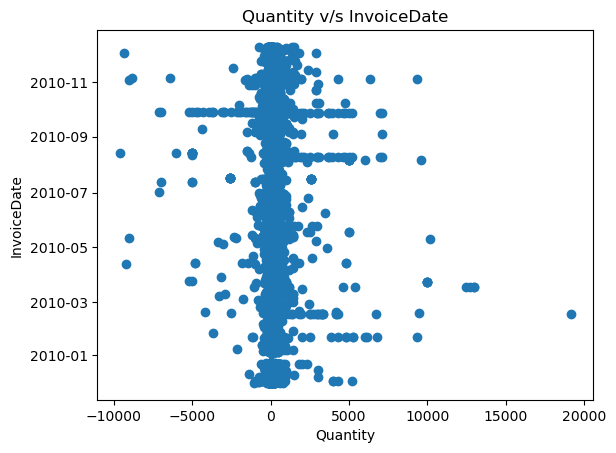

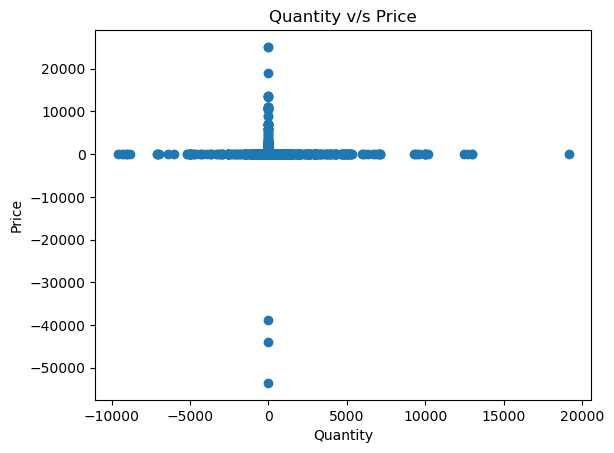

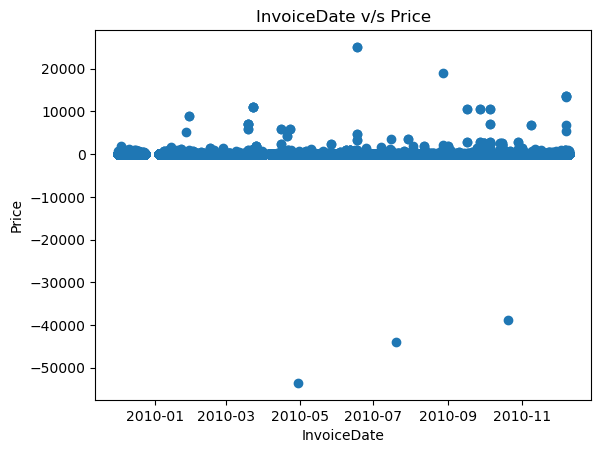

## Correlation:

## Missing Matrix:

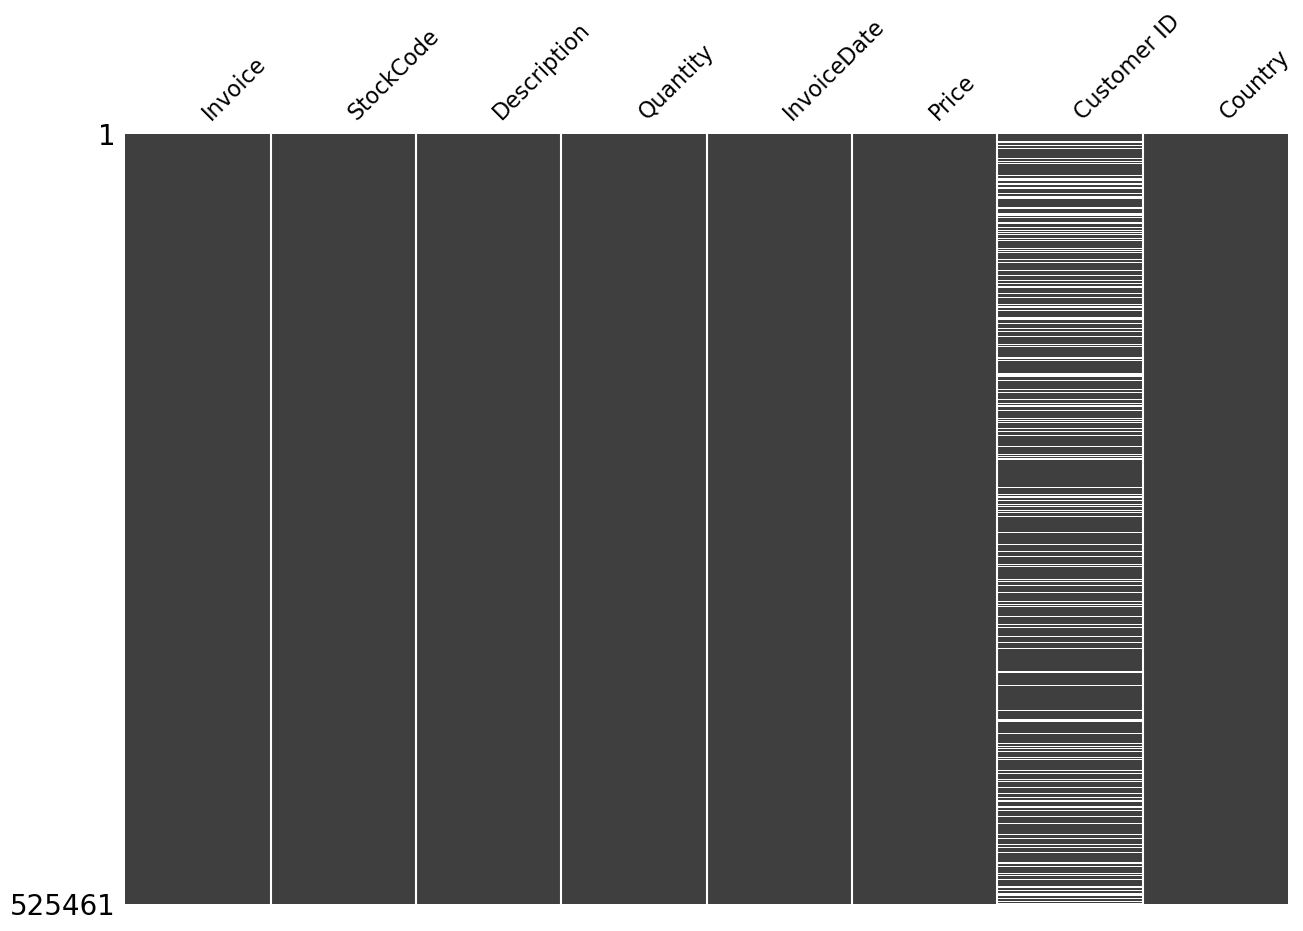

In [15]:
profile_df(df_retail)

El análisis multivariado muestra los siguientes resultados:
- Del gráfico `Quantity v/s InvoiceDate` se observan días que tienen una cantidad negativa de productos vendidos, que carece de sentido bajo el supuesto de que sólo se venden productos y no hay devoluciones de estos.
- Del gráfico `Quantity v/s Price` se observa que hay productos con precio negativo y cantidad igual a 0, los cuales carecen de sentido y deberían ser filtrados
- Del gráfico `InvoiceDate v/s Price` se obseva nuevamente precios negativos en algunas fechas, por ejemplo, en mayo del 2010.
- Del la `matriz de correlación` sólo se concluye que hay correlación prácticamente nula entre la Cantidad, el precio y la fecha de la factura.
- De la `matriz de nulos` se observa que sólo existen nulos en la columna de `Customer ID` y no se observa algún patrón interesante.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [16]:
df_retail[df_retail.Price==0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom
470,489521,21646,nan,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,nan,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,nan,-18,2010-12-09 17:17:00,0.0,NaN,United Kingdom
525232,538158,20892,nan,-32,2010-12-09 17:17:00,0.0,NaN,United Kingdom
525233,538160,20956,nan,288,2010-12-09 17:18:00,0.0,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.0,NaN,United Kingdom


In [17]:
def clean_df(df):
    non_negative_columns = ['Quantity','Price']
    for col in non_negative_columns:
        df = df[df[col]>0]
    df = df.dropna(subset=['Customer ID'])
    return df

In [18]:
df_retail_clean = clean_df(df_retail)

In [19]:
for col in df_retail_clean.columns:
    profile_serie(df_retail_clean[col])

## Invoice Profile

Type                           category
Number of observations           407664
Unique                            19213
Top                              500356
Freq                                270
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   405936
Duplicate rows (%)              99.58 %
Total size in memory      5363976 bytes
dtype: object

## StockCode Profile

Type                           category
Number of observations           407664
Unique                             4017
Top                              85123A
Freq                               3153
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   407506
Duplicate rows (%)              99.96 %
Total size in memory      4245832 bytes
dtype: object

## Description Profile

Type                                                  object
Number of observations                                407664
Unique                                                  4444
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3153
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        407462
Duplicate rows (%)                                   99.95 %
Total size in memory                           6522624 bytes
dtype: object

## Quantity Profile

Type                              int64
Number of observations         407664.0
Mean                          13.585585
Std                           96.840747
Min                                 1.0
25%                                 2.0
50%                                 5.0
75%                                12.0
Max                             19152.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        9572.064923
Skew                          79.917702
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   407550
Duplicate rows (%)              99.97 %
Total size in memory      6522624 bytes
dtype: object

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           407664
Mean                      2010-07-01 10:15:11.871688192
Min                                 2009-12-01 07:45:00
25%                                 2010-03-26 14:01:00
50%                                 2010-07-09 15:47:00
75%                                 2010-10-14 17:09:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   406199
Duplicate rows (%)                              99.64 %
Total size in memory                      6522624 bytes
dtype: object

## Price Profile

Type                            float64
Number of observations         407664.0
Mean                           3.294438
Std                           34.757965
Min                               0.001
25%                                1.25
50%                                1.95
75%                                3.75
Max                             10953.5
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                       63865.331746
Skew                         235.066862
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   407478
Duplicate rows (%)              99.95 %
Total size in memory      6522624 bytes
dtype: object

## Customer ID Profile

Type                           category
Number of observations         407664.0
Unique                           4312.0
Top                             14911.0
Freq                             5570.0
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   407573
Duplicate rows (%)              99.98 %
Total size in memory      4243840 bytes
dtype: object

## Country Profile

Type                              object
Number of observations            407664
Unique                                37
Top                       United Kingdom
Freq                              370929
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    407664
Duplicate rows (%)               100.0 %
Total size in memory       6522624 bytes
dtype: object

Al realizar la limpieza se observa una disminución de la cantidad de datos. Se pasa de 525461 observaciones a 407664.
 
Las unicas variables afectadas son `Quantity`, `Price` ya que presentaban valores inconsitentes. Por ejemplo, en  `Price` el Skewness pasa de ser negativo a positivo, lo que indica que los valores se sesgan hacia la derecha, es decir, valores más altos.

Además, en la variable `InvoiceDate` la distribución se mantiene en su forma, sin embargo, el periodo con mayor cantidad de transacciones pasa de ser del 7-20 noviembre de 2010 al 21-4 diciembre 2010.

## Bivariant Analysis:

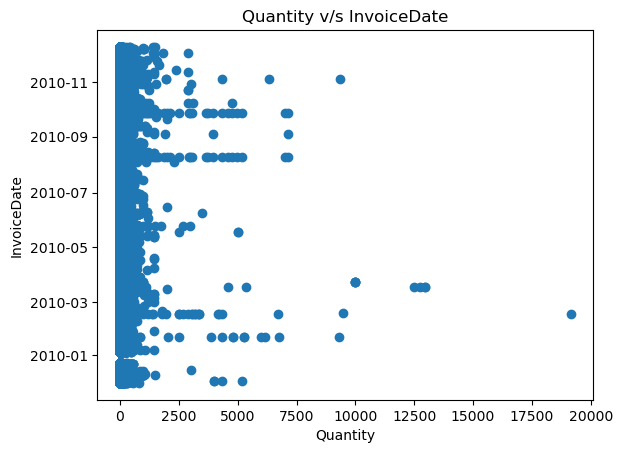

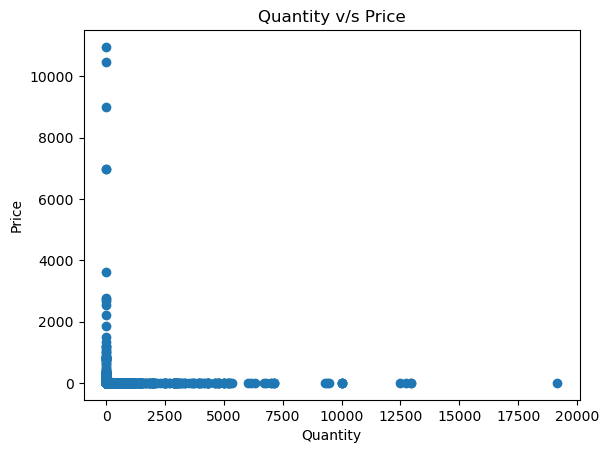

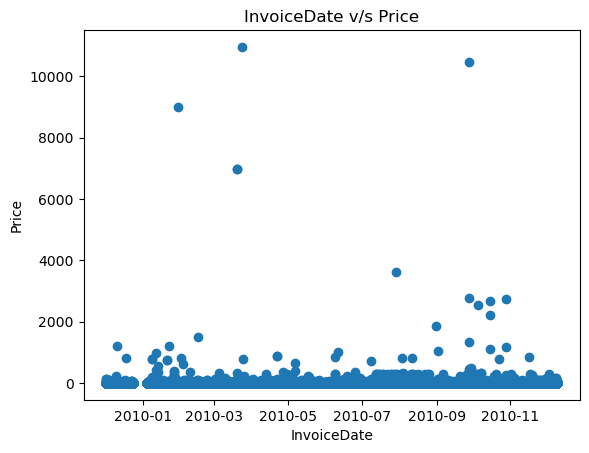

## Correlation:

## Missing Matrix:

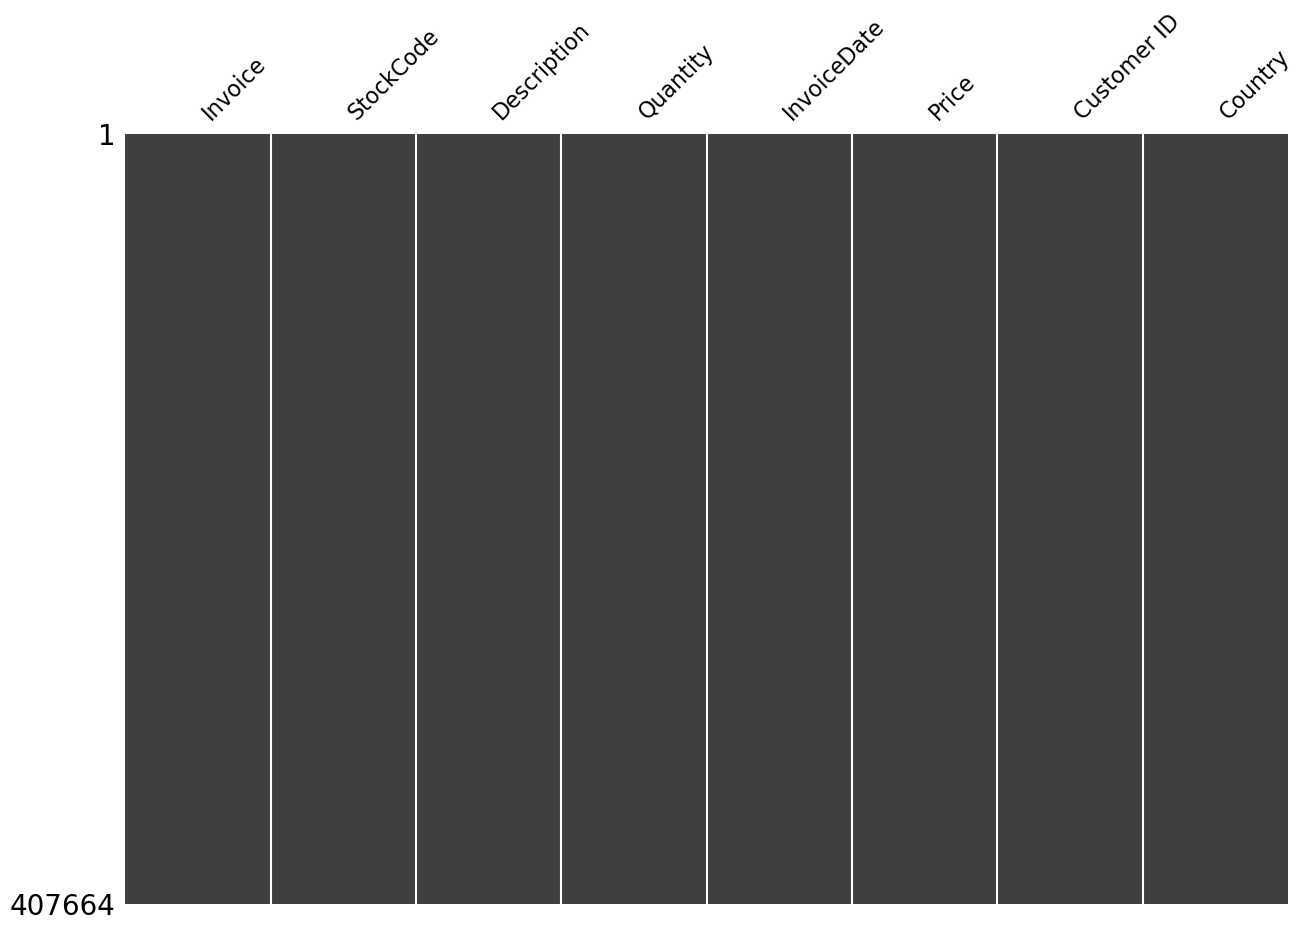

In [20]:
profile_df(df_retail_clean)

En el análisis bivariado se puede observar que el scatterplot entre `Quantity v/s InvoiceDate` tiene sentido y ya no hay cantidades negativas. Asimismo, en el scatterplot `Quantity v/s Price` se observa que los productos más vendidos tienen precios bajos y los productos menos vendidos precios altos.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [21]:
df_retail_c = df_retail_clean.copy()

# columna de ganancias
df_retail_c["Income"] = df_retail_c["Price"] * df_retail_c["Quantity"]

top_30 = df_retail_c.groupby('Description')[['Income','Quantity']].sum().sort_values('Income',ascending=False).head(30).reset_index()

In [22]:
top_30.head()

,Description,Income,Quantity
0,WHITE HANGING HEART T-LIGHT HOLDER,151624.31,56915
1,REGENCY CAKESTAND 3 TIER,143893.35,12497
2,Manual,98560.64,2630
3,ASSORTED COLOUR BIRD ORNAMENT,70493.83,44551
4,JUMBO BAG RED RETROSPOT,51759.30,29578


In [23]:
import plotly.graph_objects as go


fig = go.Figure(
    data=[
        go.Bar(name='Income', x=top_30.Description, y=top_30.Income, yaxis='y', offsetgroup=1),
        go.Bar(name='Quantity', x=top_30.Description, y=top_30.Quantity, yaxis='y2', offsetgroup=2)
    ],
    layout={
        'yaxis': {'title': 'Income'},
        'yaxis2': {'title': 'Quantity','overlaying': 'y', 'side': 'right'}
    }
)
fig.update_layout(barmode='group')
fig.show()

Se puede observar que de manera general los productos más vendidos no necesariamente coinciden con los que generan más ganancias. En algunos casos coincide, por ejemplo, el producto `WHITE HANGING HEART T-LIGHT HOLDER` es el más vendido y coincide como el que genera más ganancia. Incluso, el tercera producto que genera más ingresos llamado `Manual` tiene sólo 2630 unidades vendidas, muy pocas comparadas respecto a los otros productos.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [51]:
def plot_ventas(dataframe):
    income_by_day = dataframe.groupby(pd.Grouper(key='InvoiceDate', freq='D'))['Income'].sum().to_frame('Income').reset_index().sort_values('InvoiceDate')
    fig = px.line(income_by_day, x='InvoiceDate', y="Income")
    fig.show()

In [53]:
plot_ventas(df_retail_c)

Se puede observar que desde el 24 de diciembre de 2009 al 3 de enero del 2010 no se observan ventas, lo cual es extraño, ya que es un periodo festivo. De igual manera, entre el 2 y 5 de abril de 2010 tampoco se obsevan ventas. Asimismo, se puede observar que las ventas son ciclicas semanalmente y desde septiembre de 2010 alcanzan valores más altos, donde hay un peak de ventas el 27 de septiembre.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>